# Import Libraries

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset & remove missing values

In [5]:
os.chdir("C:/Users/Syafiq Irfan/OneDrive/Desktop/Projects/EPL_2122")
epl_2122 = pd.read_csv("EPL_2122.csv")

epl_2122.isna().sum()
epl_2122.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/8/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/8/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/8/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/8/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/8/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


# Teams with most home goals

In [8]:
Home = epl_2122.loc[:,["HomeTeam", "FTHG"]]
print(Home)
HomeGoals = Home.groupby('HomeTeam',as_index = False)['FTHG'].sum().sort_values(by = 'FTHG', ascending=True)
HomeGoals.head(20)

           HomeTeam  FTHG
0         Brentford     2
1        Man United     5
2           Burnley     1
3           Chelsea     3
4           Everton     3
..              ...   ...
375  Crystal Palace     1
376       Leicester     4
377       Liverpool     3
378        Man City     3
379         Norwich     0

[380 rows x 2 columns]


,HomeTeam,FTHG
14,Norwich,12
17,Watford,17
4,Burnley,18
3,Brighton,19
8,Leeds,19
19,Wolves,20
2,Brentford,22
15,Southampton,23
13,Newcastle,26
6,Crystal Palace,27


# Plot home goals bar chart

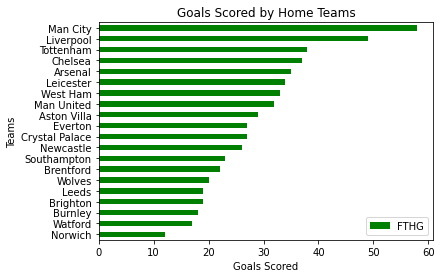

In [20]:
c = ['green']
bar = Teams.plot.barh(x="HomeTeam", y="FTHG", alpha=1, color=c)
bar.set_xlabel("Goals Scored")
bar.set_ylabel("Teams")
bar.title.set_text("Goals Scored by Home Teams")

# Teams with most away goals

In [9]:
Away = epl_2122.loc[:,["AwayTeam", "FTAG"]]
print(Away)
AwayGoals = Away.groupby('AwayTeam',as_index = False)['FTAG'].sum().sort_values(by = 'FTAG', ascending=True)
AwayGoals.head(20)

           AwayTeam  FTAG
0           Arsenal     0
1             Leeds     1
2          Brighton     2
3    Crystal Palace     0
4       Southampton     1
..              ...   ...
375      Man United     0
376     Southampton     1
377          Wolves     1
378     Aston Villa     2
379       Tottenham     5

[380 rows x 2 columns]


,AwayTeam,FTAG
14,Norwich,11
4,Burnley,16
7,Everton,16
17,Watford,17
19,Wolves,18
13,Newcastle,18
15,Southampton,20
1,Aston Villa,23
3,Brighton,23
6,Crystal Palace,23


# Plot away goals bar chart

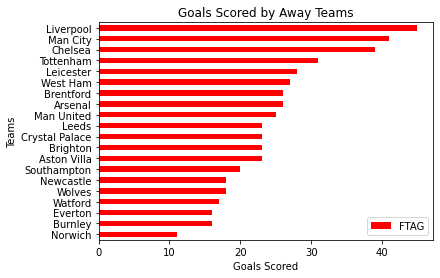

In [22]:
c = ['red']
bar = Teams.plot.barh(x="AwayTeam", y="FTAG", alpha=1, color=c)
bar.set_xlabel("Goals Scored")
bar.set_ylabel("Teams")
bar.title.set_text("Goals Scored by Away Teams")

# Total goals scored

In [23]:
numberofgoalscored = AwayGoals.join(HomeGoals)
numberofgoalscored['Total Goals Scored'] = numberofgoalscored.FTHG + numberofgoalscored.FTAG

numberofgoalscored = numberofgoalscored.drop(columns= ['HomeTeam'])
numberofgoalscored['Team']  = numberofgoalscored['AwayTeam']
numberofgoalscored = numberofgoalscored.drop(columns = 'AwayTeam')
numberofgoalscored = numberofgoalscored[['Team','FTAG','FTHG','Total Goals Scored']]
numberofgoalscored.head(20)

,Team,FTAG,FTHG,Total Goals Scored
14,Norwich,11,12,23
4,Burnley,16,18,34
7,Everton,16,27,43
17,Watford,17,17,34
19,Wolves,18,20,38
13,Newcastle,18,26,44
15,Southampton,20,23,43
1,Aston Villa,23,29,52
3,Brighton,23,19,42
6,Crystal Palace,23,27,50


# Total Goals Conceded

In [24]:
mostgoalsconceded = epl_2122.loc[:,['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
hometeamconceded = mostgoalsconceded.groupby('HomeTeam',as_index = False)['FTAG'].sum().sort_values(by = 'FTAG', ascending=True)
awayteamconceded = mostgoalsconceded.groupby('AwayTeam',as_index = False)['FTHG'].sum().sort_values(by = 'FTHG', ascending=True)
totalgoalsconceded = awayteamconceded.join(hometeamconceded)
totalgoalsconceded['Total Goals Conceded'] = totalgoalsconceded.FTHG + totalgoalsconceded.FTAG

totalgoalsconceded['Team'] = totalgoalsconceded['AwayTeam']
totalgoalsconceded = totalgoalsconceded.drop(columns= ['HomeTeam','AwayTeam'])
totalgoalsconceded = totalgoalsconceded[['Team','FTHG','FTAG','Total Goals Conceded']]
totalgoalsconceded.head(20)

,Team,FTHG,FTAG,Total Goals Conceded
5,Chelsea,11,22,33
11,Man City,11,15,26
10,Liverpool,17,9,26
19,Wolves,18,25,43
3,Brighton,21,23,44
16,Tottenham,21,19,40
1,Aston Villa,25,29,54
18,West Ham,25,26,51
4,Burnley,28,25,53
6,Crystal Palace,29,17,46


# Goals scored vs Goals against

In [27]:
mosteffectiveteam = totalgoalsconceded.join(numberofgoalscored['Total Goals Scored'])

mosteffectiveteam = mosteffectiveteam.reset_index()
mosteffectiveteam = mosteffectiveteam.drop(columns='index')
mosteffectiveteam = mosteffectiveteam.drop(columns= ['FTAG','FTHG'])

mosteffectiveteam['Goals/Conceded Goals'] = mosteffectiveteam['Total Goals Scored']/ mosteffectiveteam['Total Goals Conceded']
mosteffectiveteam = mosteffectiveteam.sort_values(by='Goals/Conceded Goals',ascending=True)
mosteffectiveteam.head(20)

,Team,Total Goals Conceded,Total Goals Scored,Goals/Conceded Goals
16,Norwich,84,23,0.273810
10,Watford,77,34,0.441558
18,Leeds,79,42,0.531646
8,Burnley,53,34,0.641509
19,Southampton,67,43,0.641791
17,Everton,66,43,0.651515
13,Newcastle,62,44,0.709677
14,Brentford,56,48,0.857143
3,Wolves,43,38,0.883721
4,Brighton,44,42,0.954545


# Goals scored vs Goals against scatter plot

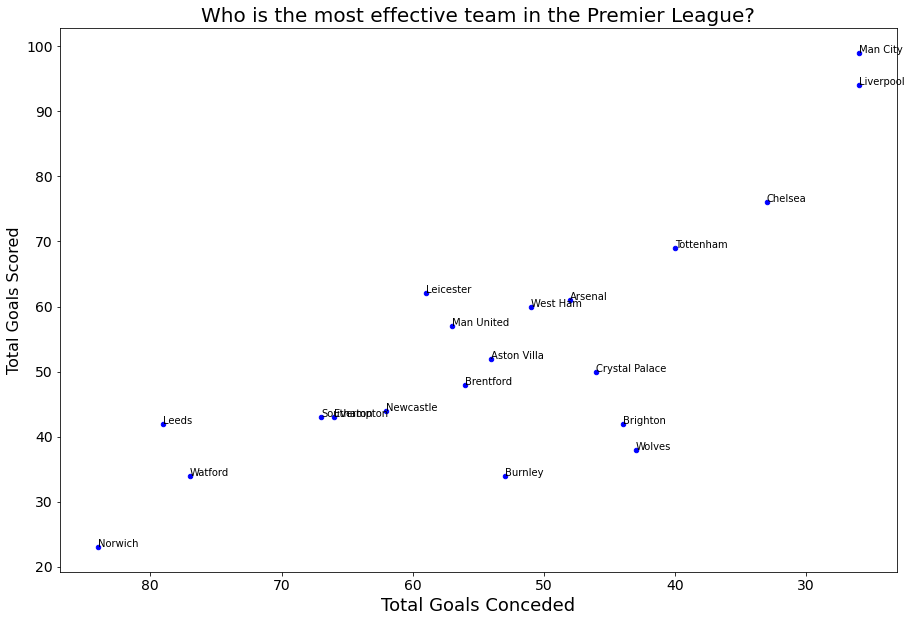

In [29]:
# Plotting the most effective team
c = ['blue']
ax = mosteffectiveteam.plot.scatter(x = 'Total Goals Conceded', y = 'Total Goals Scored', figsize = (15,10),color = c)
# Plotting the labels for the scatter plot
mosteffectiveteam[['Total Goals Conceded','Total Goals Scored','Team']].apply(lambda x: ax.text(*x),axis=1)
# Making the labels bigger
plt.rcParams.update({'font.size': 14})
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
# Inverting x axis so the least number of goals is on the right side instead of left
plt.gca().invert_xaxis()
# Labeling the data
plt.xlabel('Total Goals Conceded', fontsize=18)
plt.ylabel('Total Goals Scored', fontsize=16)
plt.title('Who is the most effective team in the Premier League?', fontsize= 20)
plt.show()